In [0]:
# Data source
#https://data.gov.uk/dataset/bc207b50-8ead-48fb-a026-f9bec0764d1b/cancer-registration-epidemiology-of-melanoma-1995-2017

In [0]:
## Read from GDrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
cd "/content/drive/My Drive/HealthData/"

/content/drive/My Drive/HealthData


In [0]:
ls CancerReg/Data.tsv

CancerReg/Data.tsv


In [0]:
#import chartify
import pandas as pd
import numpy as np
import re
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
melanoma=pd.read_table('CancerReg/Data.tsv',delimiter="\t")

In [0]:
print(melanoma.head(5))

  BRESLOW  diag_quarter  DIAGNOSISYEAR  ... CLARKS       QUINTILE_2015  DCO
0     NaN             4           1999  ...    NaN                   2    N
1     NaN             4           1999  ...    NaN                   3    N
2     NaN             4           1999  ...    NaN  1 - least deprived    N
3     NaN             2           2007  ...    NaN                   3    N
4     NaN             4           1999  ...    NaN                   4    N

[5 rows x 24 columns]


In [0]:
melanoma.shape[0] #Number of columns

65534

In [0]:
# Explore missing data
missingTotal=melanoma.T.isnull().values.sum(axis=1) 
percentMissing=[each/melanoma.shape[0] * 100 for each in missingTotal]
percentMissing=pd.DataFrame(percentMissing,melanoma.columns)
percentMissing=percentMissing.rename(columns={0:"pcntMissing"})

How much is actually usable

                      pcntMissing
BRESLOW                 37.150182
diag_quarter             0.000000
DIAGNOSISYEAR            0.000000
ethnicity_band           0.000000
age_group                0.000000
HISTOLOGY_CODED          0.001526
HISTOLOGY_CODED_DESC     0.534074
SEX                      0.000000
SITE_ICD10_O2            0.000000
SITE_CODED_DESC          0.000000
T_IMG                   99.977111
N_IMG                   99.806207
M_IMG                   99.572741
CREG_CODE                0.000000
CREG_NAME                0.000000
BASISOFDIAGNOSIS         0.000000
MORPH_ICD10_O2           0.001526
BEHAVIOUR_ICD10_O2       0.001526
STAGE_BEST              52.748192
STAGE_PATH              98.400830
GRADE                    0.009156
CLARKS                  48.426771
QUINTILE_2015            0.000000
DCO                      0.000000


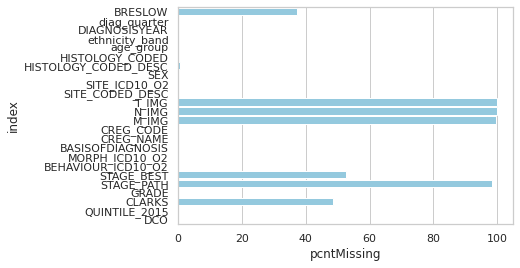

In [0]:
print(percentMissing)
sns.set(style="whitegrid")
sns.barplot(x="pcntMissing", y="index",data=percentMissing.reset_index(),color="skyblue")

* BRESLOW, (Breslow thickness of tumour, Measured in millimetres to the nearest 0.01mm. Can be a number or range, x, or blank (e.g. ≤1mm, 1-2mm) 
* diag_quarter (diagnosis quarter is based on the calendar year) 
* DIAGNOSISYEAR, (year of diagnosis, 1995-2017) 
* ethnicity_band (aggregated in 3 categories: White; Non-White and Unknown) 
* age_group (aggregated in 3 categories: <45; 45-69 and 70+) 
* HISTOLOGY_CODED, (histology code - combines the morphology and behaviour codes)
* HISTOLOGY_CODED_DESC, (name for the histology type) 
* SEX, (coded as 1=Male and 2=Female) 
* SITE_ICD10_O2, (valid 4-digit code, coded in accordance with classification system of The International Classification of Diseases for Oncology) (C430-C439) 
* SITE_CODED_DESC, (Site code of the cancer, in the coding system that the tumour was originally coded in and text description) 
* T_IMG, (The UICC code which classifies the size and extent of the primary tumour before treatment) 
* N_IMG, (The UICC code which classifies the absence or presence and extent of regional lymph node metastases before treatment. +, 0, 1, 1a, 1b, 1c, 1mi, 2, 2a, 2b, 2c, 3, 3a, 3b, 3c, X)
* M_IMG, The UICC code which classifies the absence or presence of distant metastases pre-treatment. 0 = no distant metastasis. 1, 1a, 1b, 1c, 1e = distant metastasis. X = unknown)
* CREG_CODE, (Cancer registry catchment area code (at diagnosis) Y0201 = Northern and Yorkshire Cancer Registry and Information Service; Y0301 = Trent Cancer Registry; Y0401 = Eastern Cancer Registration and Information Centre; Y0801 = Thames Cancer Registry; Y0901 = Oxford Cancer Intelligence Unit; Y1001 = South West Cancer Intelligence Service; Y1101 = Welsh Cancer Intelligence and Surveillance Unit; Y1201 = West Midlands Cancer Intelligence Unit; Y1701 = North West Cancer Intelligence Service; Z9999 = null.
* CREG_NAME, Cancer registry catchment area name (at diagnosis) See above for coding. 
* BASISOFDIAGNOSIS, Basis of diagnosis of the tumour according to all the data received by the registry. Non-microscopic: 0 = Death certificate; 1 = Clinical: Diagnosis made before death without (2-7); 2 = Clinical investigation: Includes all diagnostic techniques without a tissue diagnosis; 4 = Specific tumour markers: Includes biochemical and/or immunological markers which are site specific. 
Microscopic: 5 = Cytology: Examination of cells whether from a primary or secondary site, including fluids aspirated using endoscopes or needles. Also including microscopic examination of peripheral blood films and trephine bone marrow aspirates; 6 = Histology of a metastases: Includes autopsy specimens; 7 = Histology of a primary tumour: Includes all cutting and bone marrow biopsies. Also includes autopsy specimens of a primary tumour; 9 = Unknown, e.g. PAS or HISS record only. 
* MORPH_ICD10_O2, (Morphology of the cancer, in the ICD-10-O2 system)
* BEHAVIOUR_ICD10_O2 Behaviour of the cancer, in the ICD-10-O2 system
* STAGE_BEST, (where stage 1 is coded as 1, 1A, 1A2, 1B, 1C, 1E, 1S; stage 2 is coded as 2, 2A, 2A1, 2B, 2E, 2S; stage 3 is coded as 3, 3A, 3B, 3C, 3E, 3S; stage 4 is coded as 4, 4A, 4B, 4C, 4S; unknown or cannot be stage is coded as 4, 4A, 4B, 4C, 4S; unknown or cannot be staged as 0, 6, ?, U, X, blank)
* STAGE_PATH, (where stage 1 is coded as 1, 1A, 1B, 1E; stage 2 is coded as 2, 2A, 2B, 2E; stage 3 is coded as 3, 3A, 3B; stage 4 is coded as 4, 4A, 4B; unknown or cannot be staged as 0, 6, ?, X, blank) 
* GRADE, (Grade of tumour, coded as 3, 4, G1, G2, G3, G4, G5, G6, G7, GX, Unknown or blank)
* CLARKS, (Clark's stage for skin cancer) 1 = melanoma in situ: melanoma cells are only in the epidermis; 2 = melanoma cells in the papillary dermis; 3 = melanoma cells throughout papillary dermis and touching reticula; 4 = melanoma has spread into the reticular or deep dermis; 5 = melanoma has grown into the subcutaneous fat. 
* QUINTILE_2015, (Quintile score [1-5], describing income deprivation where 1= least deprived to 5= most deprived) 
* DCO (Diagnosis of death certificate only coded as N=No, Y=Yes, blank)


Filter out DCO? Only  one has DCO ([no cause of death registered](https://www.encr.eu/sites/default/files/2018-ENCR-Conference/Brenn%20Jerm_DCN%2C%20DCI%20and%20DCO%20in%20the%20CRN.pdf))

#### Predictors
* Breslow depth: Melanome size (low to highest size in mm)
* Quintile_2015: 1 - 5 (low to highest income deprived)
* Sex
* ethnicity_band (white, non-white, unkown)
* age_group (3 bins)
* HISTOLOGY_CODED [code](https://www.dhs.wisconsin.gov/wcrs/reporterinfo/icd-o-3-histology-text.pdf)+[behaviour](https://seer.cancer.gov/behavrecode/)
* SITE_ICD10_O2 - Code according to The International Classification of Diseases for Oncology
* MORPH_ICD10_O2 - Morphology of cancer
* BEHAVIOUR_ICD10_O2 - Behaviour
* STAGE_BEST
* STAGE_PATH
* GRADE

#### Label:
* CLARKS 

##### ?
* Year of diagnosis may influence?
* CREG_CODE - Cancer registry catchment area code (geographical location)
* BASISOFDIAGNOSIS - how was the melanoma identified
* DCO -  Death Certificate Only

#### No
* diag_quarter (when in the year was it diagnosed)
* HISTOLOGY_CODED_DESC (redundant with HISTOLOGY_CODED)
* SITE_CODED_DESC (Redundant with SITE_ICD10_O2)
* T_IMG - mostly empty
* N_IMG - mostly empty
* M_IMG - mostly empty
* CREG_NAME (Redundant with CREG_CODE)




#### Clean data


In [0]:
keepThis = list(melanoma[["BRESLOW","CLARKS"]].isnull().sum(1) == 0)
melanoma_clean = melanoma[keepThis]
melanoma_clean = melanoma_clean[melanoma_clean.BRESLOW != "x"]
melanoma_clean = melanoma_clean[melanoma_clean.BRESLOW != "203"]
melanoma_clean = melanoma_clean[melanoma_clean.BRESLOW != "202"]

In [0]:
melanoma_clean.columns

Index(['BRESLOW', 'diag_quarter', 'DIAGNOSISYEAR', 'ethnicity_band',
       'age_group', 'HISTOLOGY_CODED', 'HISTOLOGY_CODED_DESC', 'SEX',
       'SITE_ICD10_O2', 'SITE_CODED_DESC', 'T_IMG', 'N_IMG', 'M_IMG',
       'CREG_CODE', 'CREG_NAME', 'BASISOFDIAGNOSIS', 'MORPH_ICD10_O2',
       'BEHAVIOUR_ICD10_O2', 'STAGE_BEST', 'STAGE_PATH', 'GRADE', 'CLARKS',
       'QUINTILE_2015', 'DCO'],
      dtype='object')

In [0]:
#https://www.verywellhealth.com/clark-level-and-breslow-thickness-for-melanoma-staging-3010751

In [0]:
melanoma_clean.shape

(31944, 24)

In [0]:
### The BRESLOW column has mixed numbers and ranges, fix this. 
greatthanVals =  [True if re.search('>', bres) else False for bres in melanoma_clean.BRESLOW] # Get all that have a gt or lt values
lessthanVals =  [True if re.search('<', bres) else False for bres in melanoma_clean.BRESLOW]
rangeVals =  [True if re.search('-', bres) else False for bres in melanoma_clean.BRESLOW] # Get all ranged values

In [0]:
cleanRanged = [np.mean([float(each) for each in each.split('-') ]) for each in melanoma_clean.BRESLOW[rangeVals]] #Take mean of ranges
cleangreatThan = [float(each.replace(">","")) + 0.0001 for each in melanoma_clean.BRESLOW[greatthanVals]] #Make value slightly larger
cleanlessThan = [float(each.replace("<","")) - 0.0001 for each in melanoma_clean.BRESLOW[lessthanVals]] #Make value slightly smaller

In [0]:
melanoma_clean.BRESLOW[greatthanVals] = cleangreatThan
melanoma_clean.BRESLOW[lessthanVals] = cleanlessThan
melanoma_clean.BRESLOW[rangeVals] = cleanRanged

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
melanoma_clean.BRESLOW = melanoma_clean.BRESLOW.astype('float')

In [0]:
melanoma_clean = melanoma_clean[melanoma_clean.BRESLOW < 9]

In [0]:
melanoma_clean.describe()

,BRESLOW,diag_quarter,DIAGNOSISYEAR,HISTOLOGY_CODED,SEX,BASISOFDIAGNOSIS,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,CLARKS
count,30844.00000,30844.000000,30844.000000,30844.000000,30844.000000,30844.000000,30844.000000,30844.000000,30844.000000
mean,1.67722,2.525840,2006.337051,87354.442161,1.551452,6.996369,8735.141713,3.003631,3.114512
std,1.66876,1.080737,4.356135,129.265804,0.497354,0.169640,12.927173,0.089597,0.906832
min,0.00000,1.000000,1995.000000,80323.000000,1.000000,1.000000,8032.000000,3.000000,1.000000
25%,0.60000,2.000000,2004.000000,87213.000000,1.000000,7.000000,8721.000000,3.000000,2.000000
50%,1.00000,3.000000,2007.000000,87433.000000,2.000000,7.000000,8743.000000,3.000000,3.000000
75%,2.00000,3.000000,2010.000000,87433.000000,2.000000,7.000000,8743.000000,3.000000,4.000000
max,8.90000,4.000000,2013.000000,87803.000000,2.000000,9.000000,8780.000000,9.000000,5.000000


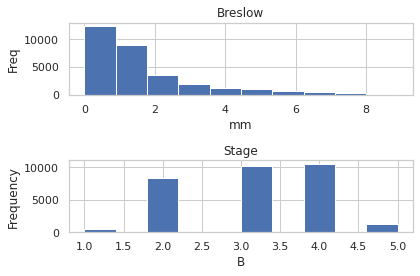

In [0]:
ax1 = plt.subplot(211)
ax1.set_title('Breslow')
ax1.set_ylabel('Freq')
ax1.set_xlabel('mm')

ax2 = plt.subplot(212)
ax2.set_title('Stage')
ax2.set_ylabel('Frequency')
ax2.set_xlabel('B')

ax1.hist(melanoma_clean['BRESLOW'])
ax2.hist(melanoma_clean['CLARKS'])

plt.tight_layout()
plt.show()

In [0]:
cut_labels = ['BDI', 'BDII', 'BDIII','BDIV']
cut_bins = [0, 1, 2,4,melanoma_clean['BRESLOW'].max()]
melanoma_clean['BDbins'] = pd.cut(melanoma_clean['BRESLOW'], bins=cut_bins, labels=cut_labels)

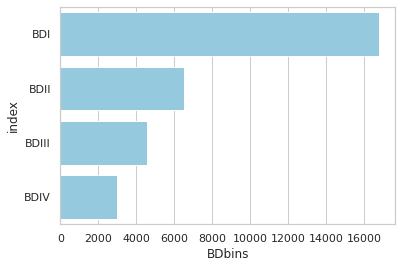

In [0]:
tmpDat = melanoma_clean.BDbins.value_counts().reset_index()
sns.set(style="whitegrid")
sns.barplot(x="BDbins", y="index",data=tmpDat,color="skyblue")

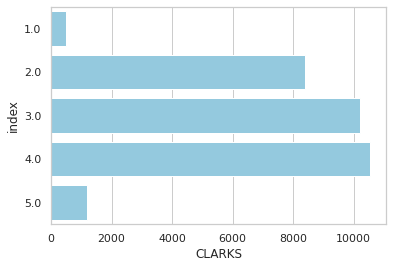

In [0]:
tmpDat = melanoma_clean.CLARKS.value_counts().reset_index()
tmpDat
sns.set(style="whitegrid")
sns.barplot(x="CLARKS", y="index",data=tmpDat,color="skyblue",orient="h")

In [0]:
#'STAGE_BEST','STAGE_PATH' not used:
# 21566 and 30083 missing values respectively
usefulCols=['BRESLOW','ethnicity_band','age_group','HISTOLOGY_CODED','SEX','SITE_ICD10_O2','MORPH_ICD10_O2','BEHAVIOUR_ICD10_O2','GRADE','QUINTILE_2015','CLARKS']
melanoma_clean_ml = melanoma_clean[usefulCols]
print(melanoma_clean_ml.shape)
melanoma_clean_ml.columns

(30844, 11)


Index(['BRESLOW', 'ethnicity_band', 'age_group', 'HISTOLOGY_CODED', 'SEX',
       'SITE_ICD10_O2', 'MORPH_ICD10_O2', 'BEHAVIOUR_ICD10_O2', 'GRADE',
       'QUINTILE_2015', 'CLARKS'],
      dtype='object')

In [0]:
melanoma_clean_ml.T.isnull().values.sum(axis=1) 

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0])

In [0]:
melanoma_clean_ml_input=melanoma_clean_ml[melanoma_clean_ml.GRADE.notnull()]
melanoma_clean_ml_input.shape

(30842, 11)

In [0]:
melanoma_clean_ml_input.head()

,BRESLOW,ethnicity_band,age_group,HISTOLOGY_CODED,SEX,SITE_ICD10_O2,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,GRADE,QUINTILE_2015,CLARKS
5,2.70,White,70+,87203.0,1,C432,8720.0,3.0,GX,5 - most deprived,4.0
10,0.80,White,45-69,87433.0,1,C435,8743.0,3.0,GX,3,3.0
11,1.30,Non-White,45-69,87433.0,1,C435,8743.0,3.0,GX,1 - least deprived,4.0
14,0.95,Non-White,70+,87433.0,1,C435,8743.0,3.0,GX,2,3.0
15,2.10,White,<45,87213.0,2,C435,8721.0,3.0,GX,2,4.0


In [0]:
replaceThis = re.compile(r' - .* deprived')
quintText =  [True if re.search("deprived", each) else False for each in melanoma_clean_ml_input.QUINTILE_2015]
cleanQUINT = [int(re.sub(regex,"",each)) for each in melanoma_clean_ml_input.QUINTILE_2015[quintText]] #Make value slightly larger
melanoma_clean_ml_input.QUINTILE_2015[quintText] = cleanQUINT

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [0]:
melanoma_clean_ml_input['QUINTILE_2015'] = melanoma_clean_ml_input['QUINTILE_2015'].astype('int')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
melanoma_clean_ml_input[["ethnicity_band","age_group","HISTOLOGY_CODED","SITE_ICD10_O2","MORPH_ICD10_O2","BEHAVIOUR_ICD10_O2","GRADE","SEX","CLARKS"]] = melanoma_clean_ml_input[["ethnicity_band","age_group","HISTOLOGY_CODED","SITE_ICD10_O2","MORPH_ICD10_O2","BEHAVIOUR_ICD10_O2","GRADE","SEX","CLARKS"]].astype('str')

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [0]:
catCols=["ethnicity_band","age_group","HISTOLOGY_CODED","SITE_ICD10_O2","MORPH_ICD10_O2","BEHAVIOUR_ICD10_O2","GRADE","SEX","CLARKS"]

In [0]:
print(melanoma_clean_ml_input.dtypes)
melanoma_clean_ml_input[catCols].describe()

BRESLOW               float64
ethnicity_band         object
age_group              object
HISTOLOGY_CODED        object
SEX                    object
SITE_ICD10_O2          object
MORPH_ICD10_O2         object
BEHAVIOUR_ICD10_O2     object
GRADE                  object
QUINTILE_2015           int64
CLARKS                 object
dtype: object


,ethnicity_band,age_group,HISTOLOGY_CODED,SITE_ICD10_O2,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,GRADE,SEX,CLARKS
count,30842,30842,30842,30842,30842,30842,30842,30842,30842
unique,3,3,25,10,19,3,5,2,5
top,White,45-69,87433.0,C435,8743.0,3.0,GX,2,4.0
freq,20445,14374,17470,9226,17500,30788,30677,17008,10535


In [0]:
# One approach to encode labels
melanoma_clean_ml_input_cats = pd.DataFrame({col: melanoma_clean_ml_input[col].astype('category').cat.codes for col in melanoma_clean_ml_input[catCols]}, index=melanoma_clean_ml_input.index)
melanoma_clean_ml_input_cats.describe()

,ethnicity_band,age_group,HISTOLOGY_CODED,SITE_ICD10_O2,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,GRADE,SEX,CLARKS
count,30842.000000,30842.000000,30842.000000,30842.000000,30842.000000,30842.000000,30842.000000,30842.000000,30842.000000
mean,1.405745,0.769211,11.164581,5.549802,8.321088,0.001783,3.986966,0.551456,2.114519
std,0.869160,0.805030,5.292172,1.464627,3.684588,0.042954,0.189093,0.497353,0.906825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,6.000000,5.000000,4.000000,0.000000,4.000000,0.000000,1.000000
50%,2.000000,1.000000,15.000000,6.000000,11.000000,0.000000,4.000000,1.000000,2.000000
75%,2.000000,1.000000,15.000000,7.000000,11.000000,0.000000,4.000000,1.000000,3.000000
max,2.000000,2.000000,24.000000,9.000000,18.000000,2.000000,4.000000,1.000000,4.000000


In [0]:
# Approach 2: hot encoding
hotencodeThis=["ethnicity_band","age_group","HISTOLOGY_CODED","SITE_ICD10_O2","MORPH_ICD10_O2","BEHAVIOUR_ICD10_O2","GRADE","SEX"]

In [0]:
melanoma_clean_ml_input[hotencodeThis].describe()

,ethnicity_band,age_group,HISTOLOGY_CODED,SITE_ICD10_O2,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,GRADE,SEX
count,30842,30842,30842,30842,30842,30842,30842,30842
unique,3,3,25,10,19,3,5,2
top,White,45-69,87433.0,C435,8743.0,3.0,GX,2
freq,20445,14374,17470,9226,17500,30788,30677,17008


In [0]:
melanoma_clean_ml_input_onehot = pd.get_dummies(melanoma_clean_ml_input, columns=hotencodeThis, drop_first=False)
melanoma_clean_ml_input_onehot.head()

,BRESLOW,QUINTILE_2015,CLARKS,ethnicity_band_Non-White,ethnicity_band_Unknown,ethnicity_band_White,age_group_45-69,age_group_70+,age_group_<45,HISTOLOGY_CODED_80323.0,HISTOLOGY_CODED_80703.0,HISTOLOGY_CODED_81433.0,HISTOLOGY_CODED_87203.0,HISTOLOGY_CODED_87205.0,HISTOLOGY_CODED_87209.0,HISTOLOGY_CODED_87213.0,HISTOLOGY_CODED_87223.0,HISTOLOGY_CODED_87233.0,HISTOLOGY_CODED_87235.0,HISTOLOGY_CODED_87303.0,HISTOLOGY_CODED_87403.0,HISTOLOGY_CODED_87413.0,HISTOLOGY_CODED_87423.0,HISTOLOGY_CODED_87425.0,HISTOLOGY_CODED_87433.0,HISTOLOGY_CODED_87435.0,HISTOLOGY_CODED_87443.0,HISTOLOGY_CODED_87445.0,HISTOLOGY_CODED_87453.0,HISTOLOGY_CODED_87613.0,HISTOLOGY_CODED_87703.0,HISTOLOGY_CODED_87713.0,HISTOLOGY_CODED_87723.0,HISTOLOGY_CODED_87803.0,SITE_ICD10_O2_C430,SITE_ICD10_O2_C431,SITE_ICD10_O2_C432,SITE_ICD10_O2_C433,SITE_ICD10_O2_C434,SITE_ICD10_O2_C435,SITE_ICD10_O2_C436,SITE_ICD10_O2_C437,SITE_ICD10_O2_C438,SITE_ICD10_O2_C439,MORPH_ICD10_O2_8032.0,MORPH_ICD10_O2_8070.0,MORPH_ICD10_O2_8143.0,MORPH_ICD10_O2_8720.0,MORPH_ICD10_O2_8721.0,MORPH_ICD10_O2_8722.0,MORPH_ICD10_O2_8723.0,MORPH_ICD10_O2_8730.0,MORPH_ICD10_O2_8740.0,MORPH_ICD10_O2_8741.0,MORPH_ICD10_O2_8742.0,MORPH_ICD10_O2_8743.0,MORPH_ICD10_O2_8744.0,MORPH_ICD10_O2_8745.0,MORPH_ICD10_O2_8761.0,MORPH_ICD10_O2_8770.0,MORPH_ICD10_O2_8771.0,MORPH_ICD10_O2_8772.0,MORPH_ICD10_O2_8780.0,BEHAVIOUR_ICD10_O2_3.0,BEHAVIOUR_ICD10_O2_5.0,BEHAVIOUR_ICD10_O2_9.0,GRADE_G1,GRADE_G2,GRADE_G3,GRADE_G4,GRADE_GX,SEX_1,SEX_2
5,2.70,5,4.0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
10,0.80,3,3.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
11,1.30,1,4.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
14,0.95,2,3.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
15,2.10,2,4.0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1


In [0]:
melanoma_clean_ml_input_onehot.shape[0] == melanoma_clean_ml_input.shape[0]

True

In [0]:
## Divide predictors and labels
X=melanoma_clean_ml_input_onehot.loc[:,~melanoma_clean_ml_input_onehot.columns.str.contains('CLARKS',case =False)]
y=melanoma_clean_ml_input_onehot.loc[:,melanoma_clean_ml_input_onehot.columns.str.contains('CLARKS',case =False)]


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
### ASYD: always split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

In [0]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train.values.ravel())
acc_perceptron = round(perceptron.score(X_test, y_test) * 100, 2)
acc_perceptron

29.16

In [0]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train.values.ravel())
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
acc_random_forest

53.01

In [0]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=500)
random_forest.fit(X_train, y_train.values.ravel())
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
acc_random_forest

53.53